# Decision Tree
Decision tree is a tool for classification and prediction. It is a tree structure flow that each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node noted as a class label. There are different algorithms to constructure decision tree such as ID3, C4.5, C5.0, CART (Classification and Regression Trees)

### Application
* Identiry customer segmentation
* Classification problems

### ID3 algorithm
1. Calculate the entropy of every attribute $a$ of the data set $S$.
2. Select the attribute that result in smallest entropy (maximum information gain) as the criterial to split data
3. Repeat step 1 and 2 until all the attributes are used splitting data

### Discussion 
* Prone to errors in classification problems with many class and relatively small number of training examples.
* Computationally expensive to train

### Reference
* https://en.wikipedia.org/wiki/ID3_algorithm
* https://www.geeksforgeeks.org/decision-tree/

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df.head()

In [66]:
'''
    Describe dataframe info
'''

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


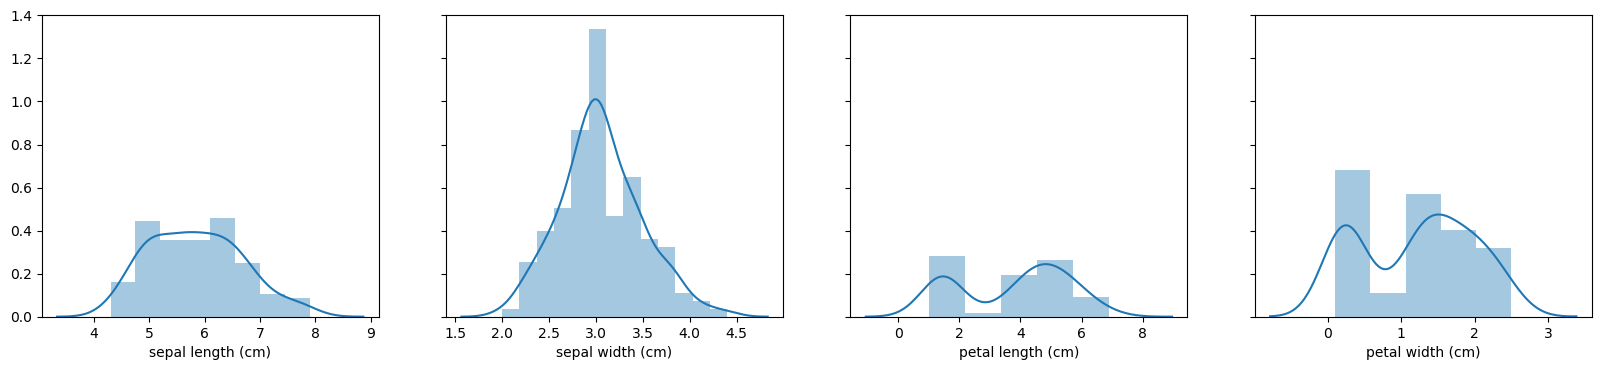

In [67]:
'''
    Grab the distribution of each columns
'''

columns_num = len(iris['feature_names'])

fig, axes = plt.subplots(1, columns_num, figsize=(20, columns_num), sharey=True, dpi=100)
for i in range(columns_num):
    sns.distplot(iris_df[iris_df.columns[i]], ax=axes[i], axlabel=iris_df.columns[i])

In [90]:
'''
    Separate the x and y 
'''

train, test = train_test_split(iris_df, test_size = 0.2)
# Separate train_x train_y and test_x and test_y
train_x = train.iloc[:, :-1]
train_y = train.iloc[:, [-1]]

test_x = test.iloc[:, :-1]
test_y = test.iloc[:, [-1]]

[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue

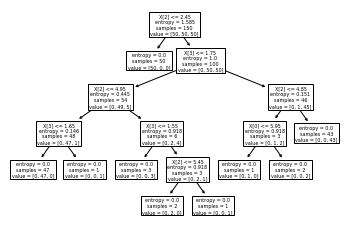

In [96]:
# Default criteria will be Gini index, here is setted to entroyp
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(train_x.to_numpy(), train_y.to_numpy())
tree.plot_tree(clf.fit(iris.data, iris.target)) 

In [127]:
pred_y = clf.predict(test_x)

result_df = pd.DataFrame({'Actual': test_y.iloc[:, 0], 'Predicted': pred_y})
print(result_df)
print("Accuracy: ", sum(test_y.iloc[:, 0] == prediction)/(prediction.size))

     Actual  Predicted
49      0.0          0
15      0.0          0
126     2.0          2
16      0.0          0
87      1.0          1
43      0.0          0
91      1.0          1
10      0.0          0
114     2.0          2
61      1.0          1
28      0.0          0
63      1.0          1
1       0.0          0
25      0.0          0
80      1.0          1
143     2.0          2
75      1.0          1
107     2.0          2
93      1.0          1
134     2.0          2
69      1.0          1
136     2.0          2
70      1.0          1
144     2.0          2
102     2.0          2
83      1.0          1
119     2.0          2
60      1.0          1
21      0.0          0
130     2.0          2
Accuracy:  1.0
